In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing test and train data 
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#lets check the shape

train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
#let us merge the data,inorder to diffrentiate whether it i a test or training data lets create an additionalcolumn called as source.
train["source"]="train"
test["source"]="test"


In [8]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [9]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [10]:
#Merging the test and train data
data=pd.concat([train,test],ignore_index=True)

In [11]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [12]:
#Lets see the categorical and numerical data types seperately
catego=data.select_dtypes(include=(np.object))
catego

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [13]:
num=data.select_dtypes(include=(np.number))

In [14]:
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,NaN
14200,7.60,0.142991,169.1448,2009,NaN
14201,10.00,0.073529,118.7440,2002,NaN
14202,15.30,0.000000,214.6218,2007,NaN


In [15]:
#lets see the number of unique vales in each feature

data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [16]:
#Lets see the subtypes of all features

for i in catego:
    print('\n%s column : '%i)
    print(data[i].value_counts())


Item_Identifier column : 
FDF22    10
FDF58    10
DRZ24    10
FDP27    10
FDV23    10
         ..
FDI46     7
FDR51     7
FDS22     7
NCL42     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column : 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column : 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column : 
OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1

In [17]:
for i in num:
    print('\n%s column : '%i)
    print(data[i].value_counts())


Item_Weight column : 
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

Item_Visibility column : 
0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

Item_MRP column : 
172.0422    8
179.7660    7
127.1020    7
177.9370    7
123.1046    7
           ..
176.9712    1
253.6014    1
118.4808    1
230.8010    1
192.0188    1
Name: Item_MRP, Length: 8052, dtype: int64

Outlet_Establishment_Year column : 
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Item_Outlet_Sales column : 
958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    1

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

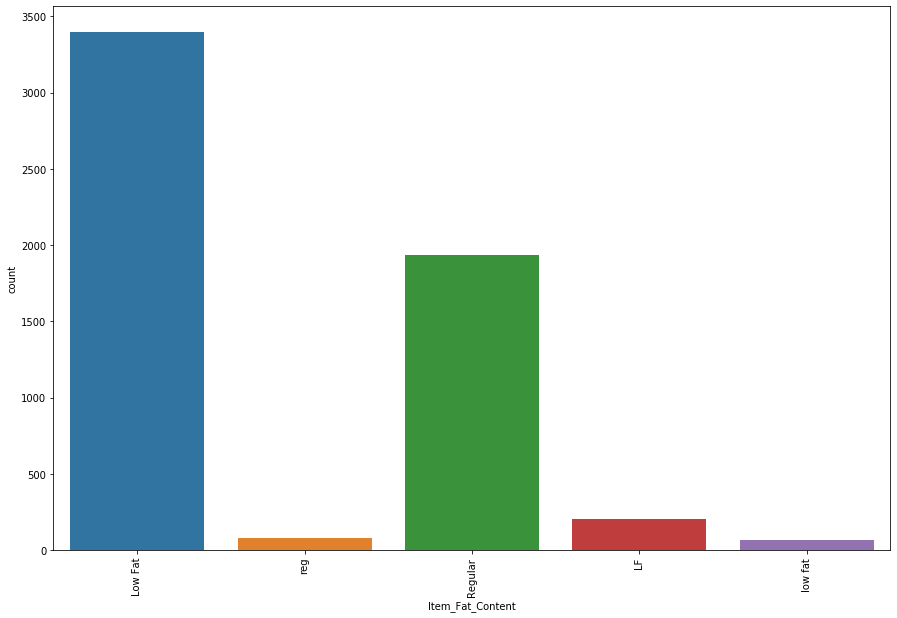

In [18]:
#Now let us see the effect of sales on each of its attribute and the features count
#Low fat items are sold more
data["Item_Fat_Content"].value_counts()
plt.figure(figsize=[15,10])
sns.countplot(test["Item_Fat_Content"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

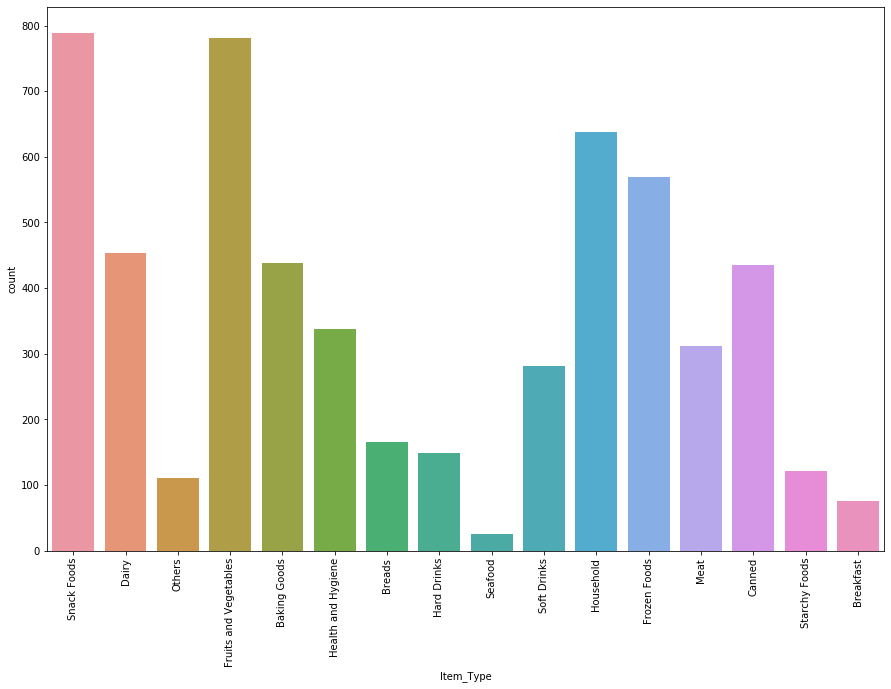

In [19]:
#Snack food,fruits and vegetables ,households and  are sold more.

data["Item_Type"].value_counts()

plt.figure(figsize=[15,10])
sns.countplot(test["Item_Type"])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

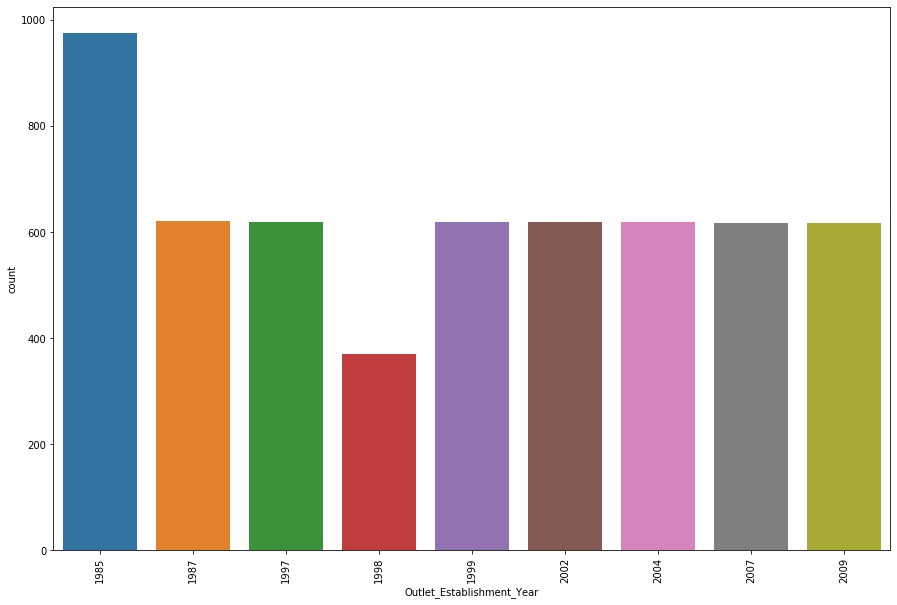

In [20]:
#Most of the oulets were established in the year 1985
data["Outlet_Establishment_Year"].value_counts()
plt.figure(figsize=[15,10])
sns.countplot(test["Outlet_Establishment_Year"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

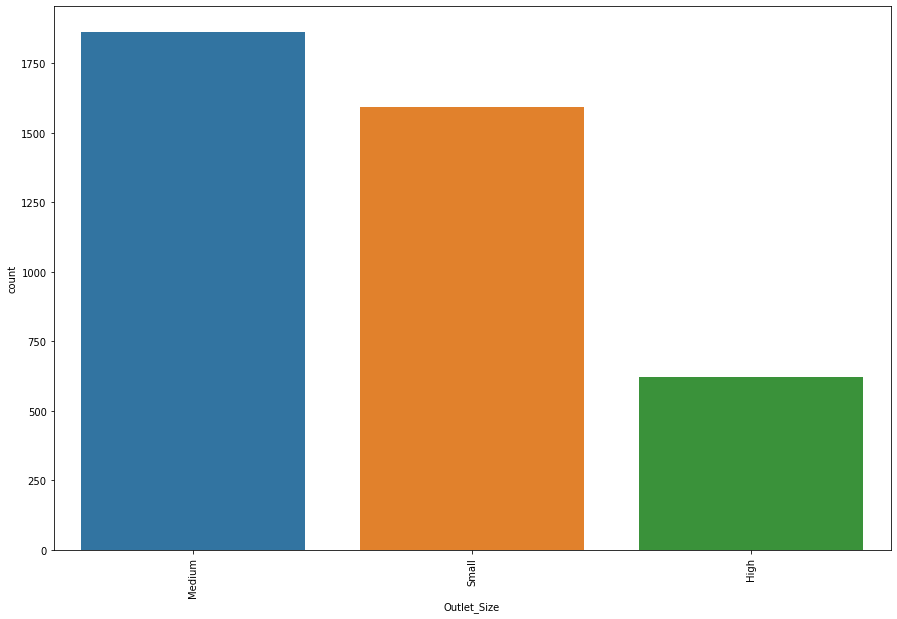

In [21]:
#Stores having mediummoutlet size has more buisness compared to other two
data["Outlet_Size"].value_counts()
plt.figure(figsize=[15,10])
sns.countplot(test["Outlet_Size"])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

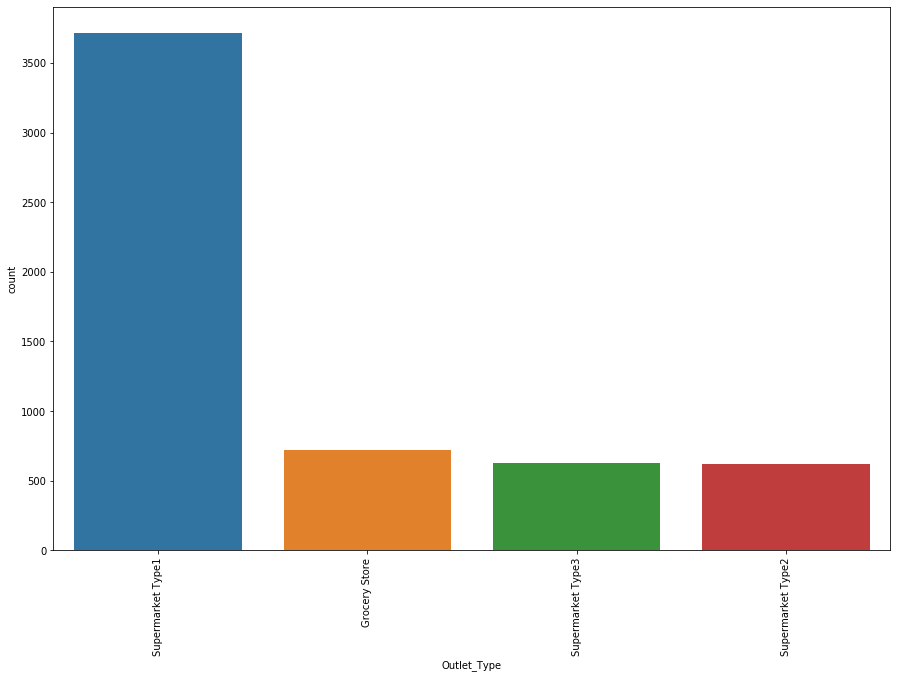

In [22]:
#Most of the sold items are from supermarket Type1
data["Outlet_Type"].value_counts()
plt.figure(figsize=[15,10])
sns.countplot(test["Outlet_Type"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

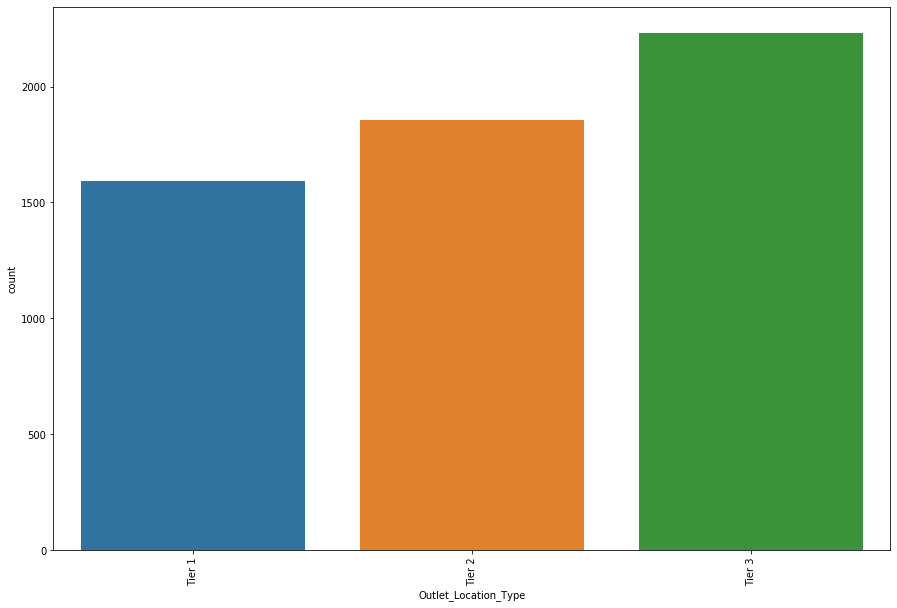

In [23]:
#Location 3 has more sales 

data["Outlet_Location_Type"].value_counts()
plt.figure(figsize=[15,10])
sns.countplot(test["Outlet_Location_Type"])
plt.xticks(rotation=90)

<function matplotlib.pyplot.show(*args, **kw)>

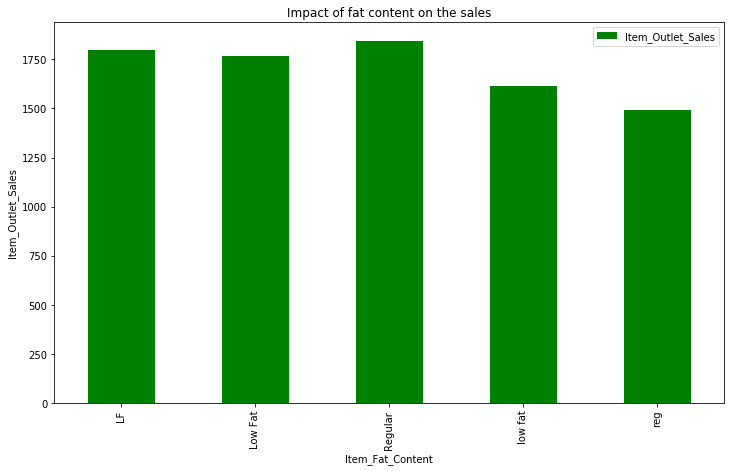

In [24]:
#Lets see the impact on the sales 
a=train.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",color="green",figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of fat content on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

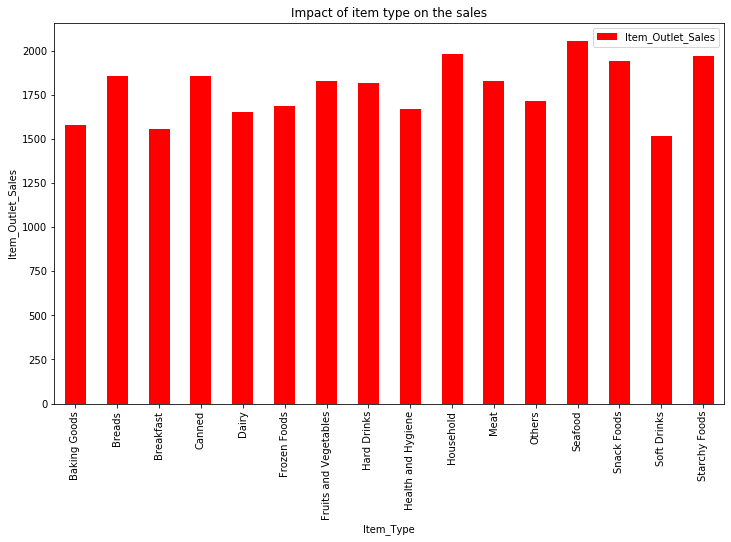

In [25]:

#Even though people buy fruits and vehetables more and they buy seafood less,the seafood is contributing more to sales that is its costlier
a=train.pivot_table(index="Item_Type",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",color="red",figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of item type on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

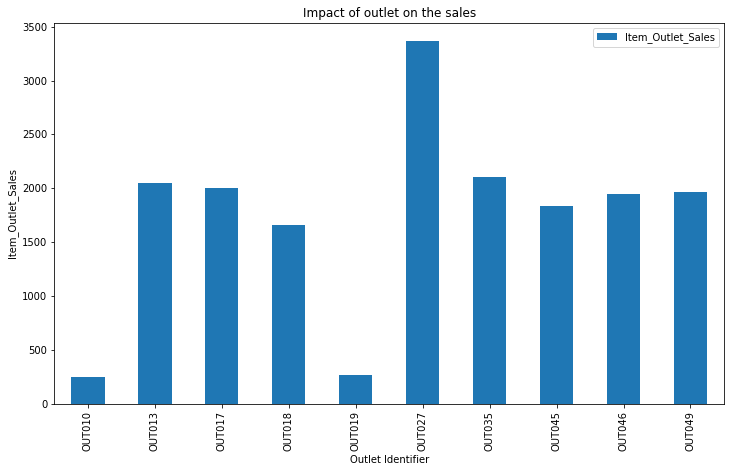

In [26]:
#More marketing happens in the 27 th outlet and very much less in 9th and 10th outlet

a=train.pivot_table(index="Outlet_Identifier",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",figsize=(12,7))
plt.xlabel("Outlet Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of outlet on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

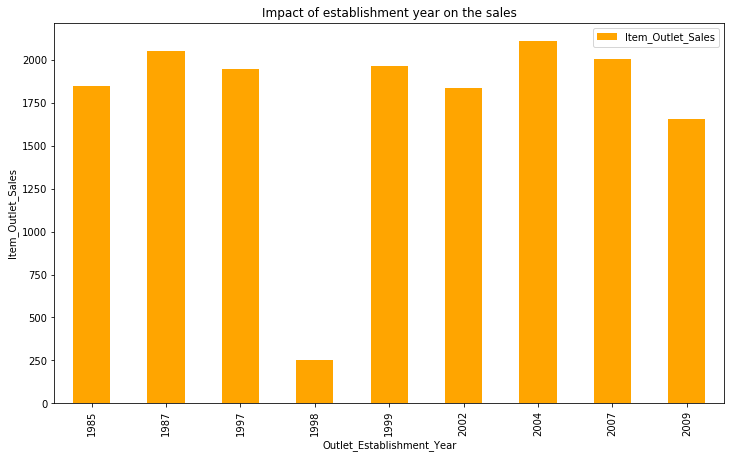

In [27]:
#The sales reached peak in the year 2004 and in the year 1998 its almost like reccession,and rose very much in the next year
# It is also because around 380 stores were opened in the year 1998 and around 600 in 1999
a=train.pivot_table(index="Outlet_Establishment_Year",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",figsize=(12,7),color="orange")
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of establishment year on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

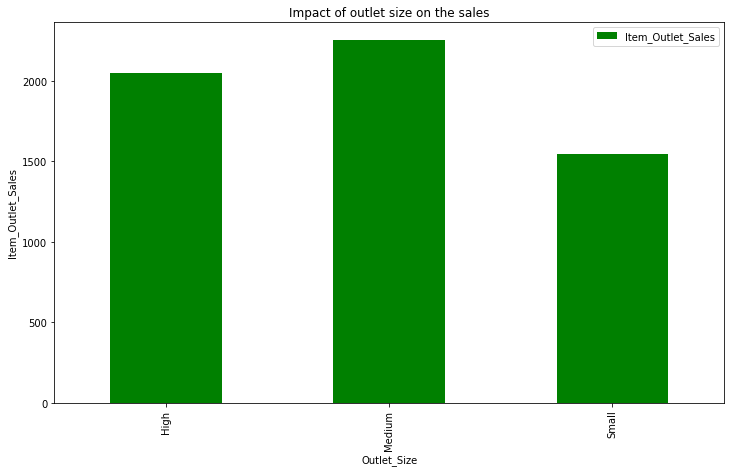

In [28]:
#There are more medium sized stores and sales is proportional to it

a=train.pivot_table(index="Outlet_Size",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",figsize=(12,7),color="green")
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of outlet size on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

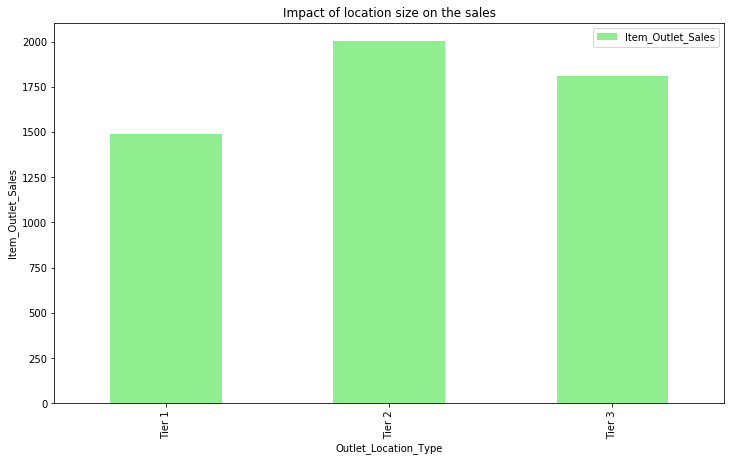

In [29]:
#More number of stores are present in tier 3 but the sales is more in tier 2 .

a=train.pivot_table(index="Outlet_Location_Type",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",figsize=(12,7),color="lightgreen")
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of location size on the sales")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

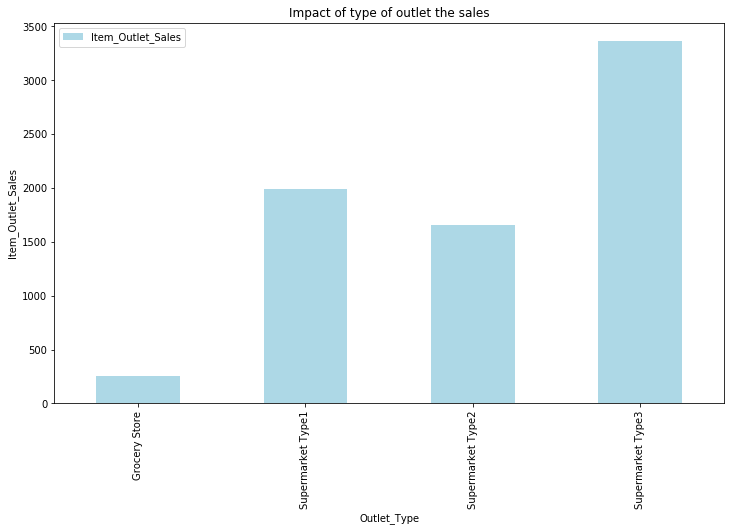

In [30]:
#Even though there are only around 300 supermarket 3 the sales is higher here compared to supermarket 1 which has more than 3500 stores

a=train.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median)
a.plot(kind="bar",figsize=(12,7),color="lightblue")
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of type of outlet the sales")
plt.show

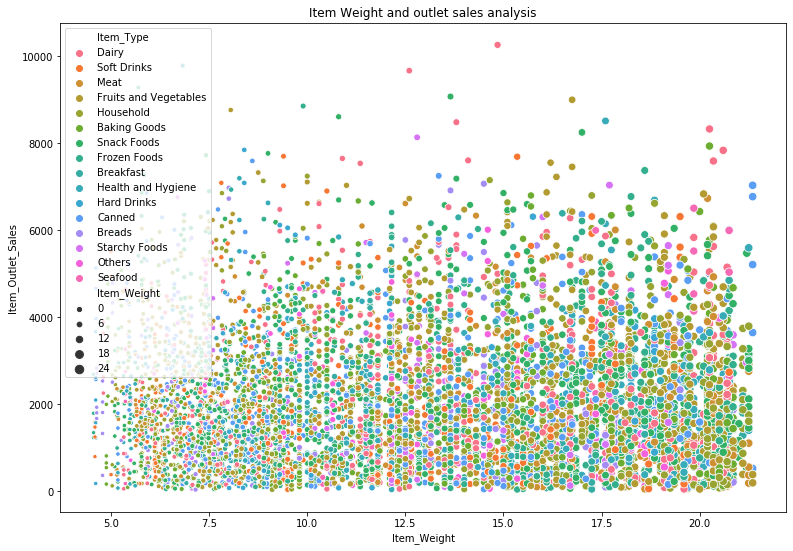

In [31]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item Weight and outlet sales analysis")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=train)

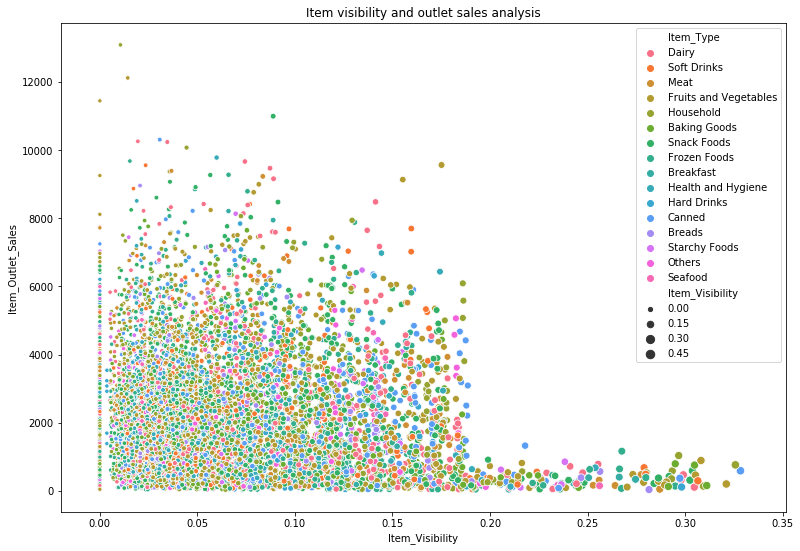

In [32]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item visibility and outlet sales analysis")
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Visibility",data=train)

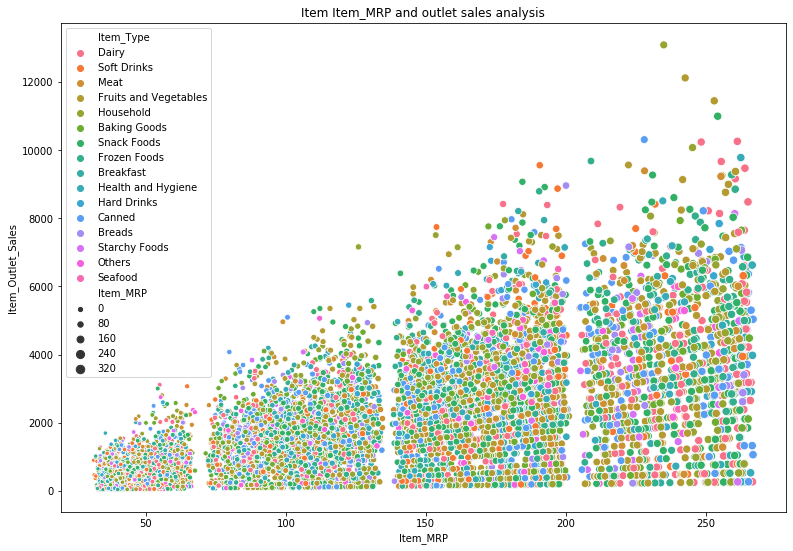

In [33]:
#The products between 150 and 200 are sold more
plt.figure(figsize=(13,9))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item Item_MRP and outlet sales analysis")
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",hue="Item_Type",size="Item_MRP",data=train)

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


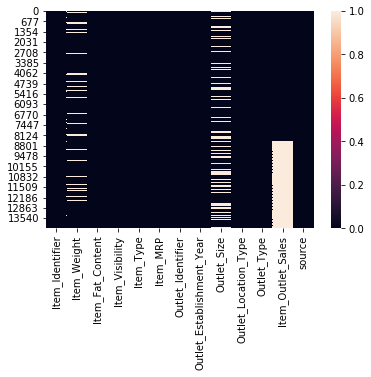

In [34]:
#Lets see if there are any null values in the data
#We see there are null values in item weight,outlet size,item oulet sales 
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [36]:
#filling the null values
data["Item_Weight"].mean()


12.792854228644991

In [37]:
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)

In [38]:
data["Item_Weight"].isnull().sum()

0

In [39]:

data["Outlet_Size"].mode()

0    Medium
dtype: object

In [40]:

data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [41]:
data["Outlet_Size"].isnull().sum()

0

In [42]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [43]:
#Now we have visibility=0 which means the items werenot visibl but still people brought it which is highly impractiacl so let us replace the 0 with the median
data[data["Item_Visibility"]==0]["Item_Visibility"].count()



879

In [44]:
c=data["Item_Visibility"].median()

In [45]:
data[data["Item_Visibility"]==0]["Item_Visibility"].count()

879

In [46]:
c

0.05402053650000001

In [47]:
data["Item_Visibility"].replace(0,c,inplace=True)

In [48]:
data[data["Item_Visibility"]==0]["Item_Visibility"].count()

0

In [49]:
#Now instead of year of establishment lets modify it to the number of years it has been in the buisness
data["Outlet_Establishment_Year"].max()

2009

In [50]:
data["Outlet_Establishment_Year"]=2009-data["Outlet_Establishment_Year"]

In [51]:
data["Outlet_Establishment_Year"]

0        10
1         0
2        10
3        11
4        22
         ..
14199    12
14200     0
14201     7
14202     2
14203     7
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [52]:
#Once observe the categories we come to know that fd means food,nc means non commercial and dr means drinks lets reduce the dimensionality because 
#if we dnt map we willl end up having 16 categories
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [53]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [54]:
#similarly because of typo there is reg,lf and low fat which are nothing but Regular lets replace them
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [55]:
data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [56]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,11,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,12,Small,Tier 1,Supermarket Type1,NaN,test,Food
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,0,Medium,Tier 3,Supermarket Type2,NaN,test,Food
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,7,Medium,Tier 2,Supermarket Type1,NaN,test,Non-Consumable
14202,FDJ26,15.30,Regular,0.054021,Canned,214.6218,OUT017,2,Medium,Tier 2,Supermarket Type1,NaN,test,Food


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
list1 = ["Item_Identifier","Item_Type",'Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
le = LabelEncoder()
for i in list1:
    data[i] = le.fit_transform(data[i])

In [59]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,10,1,0,1,3735.1380,train,1
1,8,5.92,1,0.019278,14,48.2692,3,0,1,2,2,443.4228,train,0
2,662,17.50,0,0.016760,10,141.6180,9,10,1,0,1,2097.2700,train,1
3,1121,19.20,1,0.054021,6,182.0950,0,11,1,2,0,732.3800,train,1
4,1297,8.93,0,0.054021,9,53.8614,1,22,0,2,1,994.7052,train,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,12,2,0,1,NaN,test,1
14200,308,7.60,1,0.142991,15,169.1448,3,0,1,2,2,NaN,test,1
14201,1426,10.00,0,0.073529,8,118.7440,7,7,1,1,1,NaN,test,2
14202,521,15.30,1,0.054021,3,214.6218,2,2,1,1,1,NaN,test,1


<function matplotlib.pyplot.show(*args, **kw)>

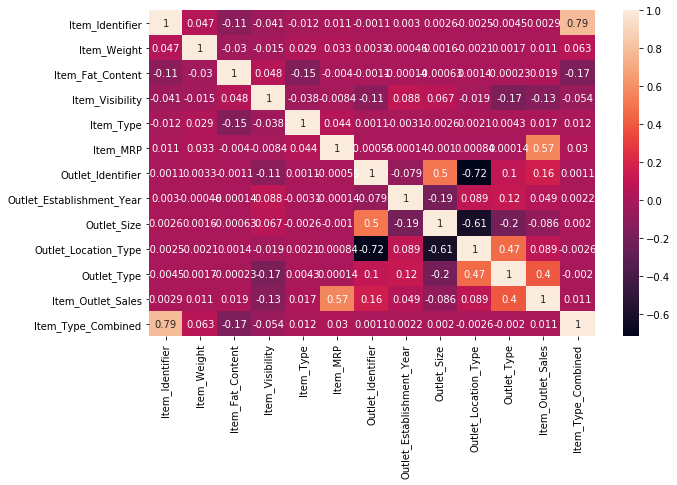

In [60]:
#we can see that mrp and outlet type contributes more to the sales.
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show

In [62]:
#Lets drop the item type 
data.drop("Item_Type",axis=1,inplace=True)

In [63]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,156,9.30,0,0.016047,249.8092,9,10,1,0,1,3735.1380,train,1
1,8,5.92,1,0.019278,48.2692,3,0,1,2,2,443.4228,train,0
2,662,17.50,0,0.016760,141.6180,9,10,1,0,1,2097.2700,train,1
3,1121,19.20,1,0.054021,182.0950,0,11,1,2,0,732.3800,train,1
4,1297,8.93,0,0.054021,53.8614,1,22,0,2,1,994.7052,train,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,141.3154,8,12,2,0,1,NaN,test,1
14200,308,7.60,1,0.142991,169.1448,3,0,1,2,2,NaN,test,1
14201,1426,10.00,0,0.073529,118.7440,7,7,1,1,1,NaN,test,2
14202,521,15.30,1,0.054021,214.6218,2,2,1,1,1,NaN,test,1


Item_Identifier                 AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Item_Weight                  AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Item_Fat_Content                AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Item_Visibility              AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Item_MRP                        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Outlet_Identifier            AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Outlet_Establishment_Year       AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Outlet_Size                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Outlet_Location_Type            AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Outlet_Type                  AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Item_Outlet_Sales               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
Item_Type_Combined           AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

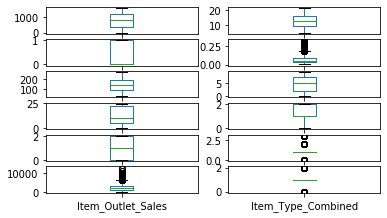

In [64]:
#Lets see the outliers 
data.plot(kind="box",subplots=True,layout=(7,2))

In [65]:
#Lets now divide the data set as it was before merging into train and testing data
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

In [66]:
#Since we have added source to identify the train and test lets drop it
train.drop("source",axis=1,inplace=True)

C:\Users\THIS PC\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
test.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)

In [68]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.300,0,0.016047,249.8092,9,10,1,0,1,3735.1380,1
1,8,5.920,1,0.019278,48.2692,3,0,1,2,2,443.4228,0
2,662,17.500,0,0.016760,141.6180,9,10,1,0,1,2097.2700,1
3,1121,19.200,1,0.054021,182.0950,0,11,1,2,0,732.3800,1
4,1297,8.930,0,0.054021,53.8614,1,22,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1,22,0,2,1,2778.3834,1
8519,897,8.380,1,0.046982,108.1570,7,7,1,1,1,549.2850,1
8520,1357,10.600,0,0.035186,85.1224,6,5,2,1,1,1193.1136,2
8521,681,7.210,1,0.145221,103.1332,3,0,1,2,2,1845.5976,1


Item_Identifier                 AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Item_Weight                  AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Item_Fat_Content                AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Item_Visibility              AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Item_MRP                        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Outlet_Identifier            AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Outlet_Establishment_Year       AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Outlet_Size                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Outlet_Location_Type            AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Outlet_Type                  AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Item_Outlet_Sales               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
Item_Type_Combined           AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

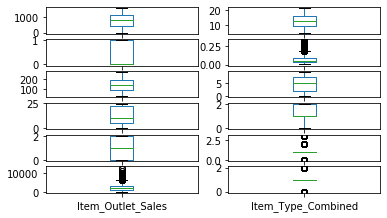

In [69]:
train.plot(kind="box",subplots=True,layout=(7,2))

In [70]:
#Removingoutliers
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[1.38851383, 0.83922588, 0.73814723, ..., 0.25265831, 0.910601  ,
        0.17979501],
       [1.71799137, 1.63904672, 1.35474328, ..., 1.00297245, 1.01844035,
        2.09528612],
       [0.26205684, 1.10116786, 0.73814723, ..., 0.25265831, 0.04923754,
        0.17979501],
       ...,
       [1.28515188, 0.53160248, 0.73814723, ..., 0.25265831, 0.57909963,
        1.73569609],
       [0.21975905, 1.33378966, 1.35474328, ..., 1.00297245, 0.19672492,
        0.17979501],
       [1.62449099, 0.46225773, 0.73814723, ..., 0.25265831, 0.82959407,
        2.09528612]])

In [71]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
        935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
       1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
       1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
       2336, 2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895,
       3017, 3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458,
       3474, 3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884,
       3993, 4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656,
       4674, 4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031,
       5050, 5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550,
       5619, 5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946,
       5977, 6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541,
       6576, 6606, 6622, 6674, 6786, 6886, 6903, 6

In [72]:
train=train[(z<3).all(axis=1)]

Item_Identifier                 AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Item_Weight                  AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Item_Fat_Content                AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Item_Visibility              AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Item_MRP                        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Outlet_Identifier            AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Outlet_Establishment_Year       AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Outlet_Size                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Outlet_Location_Type            AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Outlet_Type                  AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Item_Type_Combined              AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

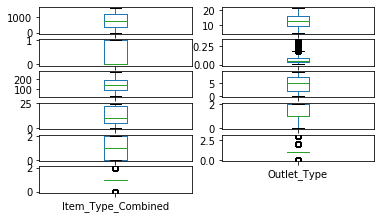

In [73]:
test.plot(kind="box",subplots=True,layout=(7,2))

In [74]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
8523,1114,20.750000,0,0.007565,107.8622,9,10,1,0,1,1
8524,1078,8.300000,1,0.038428,87.3198,2,2,1,1,1,1
8525,1420,14.600000,0,0.099575,241.7538,0,11,1,2,0,2
8526,817,7.315000,0,0.015388,155.0340,2,2,1,1,1,1
8527,1197,12.792854,1,0.118599,234.2300,5,24,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500000,1,0.013496,141.3154,8,12,2,0,1,1
14200,308,7.600000,1,0.142991,169.1448,3,0,1,2,2,1
14201,1426,10.000000,0,0.073529,118.7440,7,7,1,1,1,2
14202,521,15.300000,1,0.054021,214.6218,2,2,1,1,1,1


In [75]:
train.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

C:\Users\THIS PC\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.300,0,0.016047,249.8092,10,1,0,1,3735.1380,1
1,5.920,1,0.019278,48.2692,0,1,2,2,443.4228,0
2,17.500,0,0.016760,141.6180,10,1,0,1,2097.2700,1
3,19.200,1,0.054021,182.0950,11,1,2,0,732.3800,1
4,8.930,0,0.054021,53.8614,22,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,22,0,2,1,2778.3834,1
8519,8.380,1,0.046982,108.1570,7,1,1,1,549.2850,1
8520,10.600,0,0.035186,85.1224,5,2,1,1,1193.1136,2
8521,7.210,1,0.145221,103.1332,0,1,2,2,1845.5976,1


In [77]:
#lets split the train data x an y
y=train["Item_Outlet_Sales"]

In [78]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8333, dtype: float64

In [79]:
x=train.drop("Item_Outlet_Sales",axis=1,inplace=True)

C:\Users\THIS PC\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
x=train

In [81]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.300,0,0.016047,249.8092,10,1,0,1,1
1,5.920,1,0.019278,48.2692,0,1,2,2,0
2,17.500,0,0.016760,141.6180,10,1,0,1,1
3,19.200,1,0.054021,182.0950,11,1,2,0,1
4,8.930,0,0.054021,53.8614,22,0,2,1,2
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,22,0,2,1,1
8519,8.380,1,0.046982,108.1570,7,1,1,1,1
8520,10.600,0,0.035186,85.1224,5,2,1,1,2
8521,7.210,1,0.145221,103.1332,0,1,2,2,1


In [82]:
from sklearn.model_selection import train_test_split


In [83]:
x.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Type_Combined             int32
dtype: object

In [84]:
#Lets apply standard scaling
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [86]:
#Importing linear regreesion and the metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [87]:
for  i in range(45,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.33)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    print(r2_score(y_test,pred))

    

0.4921412700123353
0.5243848357134142
0.475936072952731
0.4839717076824598
0.48683572367936745
0.510849658530139
0.4927274805616231
0.4860987867616895
0.48538184913648086
0.5029272133090561
0.5110939494301434
0.49766383360646294
0.5013774880221707
0.5038110997756997
0.4797328276528312
0.4902466195951132
0.5127322502825586
0.48573857037979207
0.48638841530283916
0.48499996027337133
0.49492890541231205
0.4688783991389649
0.502559547561962
0.5167844942073663
0.5128002314283697
0.4871321793793023
0.48950959538529626
0.49899936087111785
0.4829857608852032
0.49522093406402723
0.5023630976055626
0.5112630888573845
0.4921495531928558
0.48727837847560174
0.5120816365661992
0.509754819712511
0.49840873261404917
0.5088597154206327
0.4909658076138338
0.4808331381993791
0.4927692380406873
0.5062113327795709
0.5007930250129675
0.5015004076155849
0.48261936635304503
0.507292714440865
0.4904580017347214
0.4883400647504822
0.49808663175878687
0.49521291169926585
0.49380787046962593
0.5055209632318063
0

In [88]:
#We see ar random state=46 we get the highest r2 score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.33)
lg=LinearRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(r2_score(y_test,pred))
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared absolute error :",mean_absolute_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
   


0.5243848357134142
Mean absolute error : 833.6592852977395
Mean squared absolute error : 833.6592852977395
Root mean squared error:  1084.0395128482314


In [89]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.33)

In [90]:
x_train.shape

(5583, 9)

In [91]:
y_train.shape

(5583,)

In [92]:
x_test.shape

(2750, 9)

In [93]:
y_test.shape

(2750,)

In [94]:
from sklearn.linear_model import Lasso,Ridge

In [95]:
#lets import lasso and ridge to improve the score
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4973570247487205

In [96]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred2=rd.predict(x_test)
rd.score(x_train,y_train)

0.4973570253748303

In [97]:
#lets check for overfitting
from sklearn.model_selection import cross_val_score

In [98]:
scores = cross_val_score(lg, x, y, cv=10)

In [99]:
scores.mean()

0.4946373179869755

In [100]:
#lets give a try using decision tree classifier
from sklearn.tree import DecisionTreeRegressor

In [101]:
tr=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tr.fit(x_train,y_train)
pred3=tr.predict(x_test)
print(r2_score(y_test,pred3))

0.5700395172264006


In [102]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
pred4=rf.predict(x_test)
print(r2_score(y_test,pred4))

0.5406269796149867


In [108]:
#Amongst all that we have tried Decision tree has given us the best results so lets use this model to predict the test data set
pred5=tr.predict(test)

In [109]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
8523,20.750000,0,0.007565,107.8622,10,1,0,1,1
8524,8.300000,1,0.038428,87.3198,2,1,1,1,1
8525,14.600000,0,0.099575,241.7538,11,1,2,0,2
8526,7.315000,0,0.015388,155.0340,2,1,1,1,1
8527,12.792854,1,0.118599,234.2300,24,1,2,3,1
...,...,...,...,...,...,...,...,...,...
14199,10.500000,1,0.013496,141.3154,12,2,0,1,1
14200,7.600000,1,0.142991,169.1448,0,1,2,2,1
14201,10.000000,0,0.073529,118.7440,7,1,1,1,2
14202,15.300000,1,0.054021,214.6218,2,1,1,1,1


In [113]:
pred5

array([4440.2202, 4440.2202, 4440.2202, ..., 4440.2202, 4440.2202,
       4440.2202])

In [120]:
predictions=pd.DataFrame(pred5)

In [121]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(tr,"trfile.obj")

['trfile.obj']

In [122]:
#Lets save the predictions into csv format
predictions.to_csv("bigmart_sales_prediction.csv")